*The Extinction Status of Psittaciformes*
================
**This file analyzes the Extinction Status of the order of Psittaciformes (Parrots)**


Research Question:

Investigate if there's a correlation between the physical characteristics of bird species, their natural environments, and their conservation status.

What roles do geographical locations play in the conservation status of bird species?

What roles do geographical locations play in the morphological traits of bird species?

Is there is a relationship between morphological traits and conservation status of bird species?

In [12]:
pip install geopandas matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [14]:
df = pd.read_csv('../dataset/Psittaciformes.csv',
                 on_bad_lines='skip',
                 encoding='utf-8',
                 dtype=str,  # Read all as string first
                 skip_blank_lines=True,
                 header=0,
                 skipinitialspace=True)

In [15]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(df['redlistCategory'].unique())

['Endangered' 'Least Concern' 'Near Threatened' 'Vulnerable'
 'Critically Endangered' 'Extinct in the Wild']


In [16]:
print(df['Habitat'].unique())

['Forest' 'Woodland' 'Grassland' 'Shrubland' 'Human Modified' nan 'Desert']


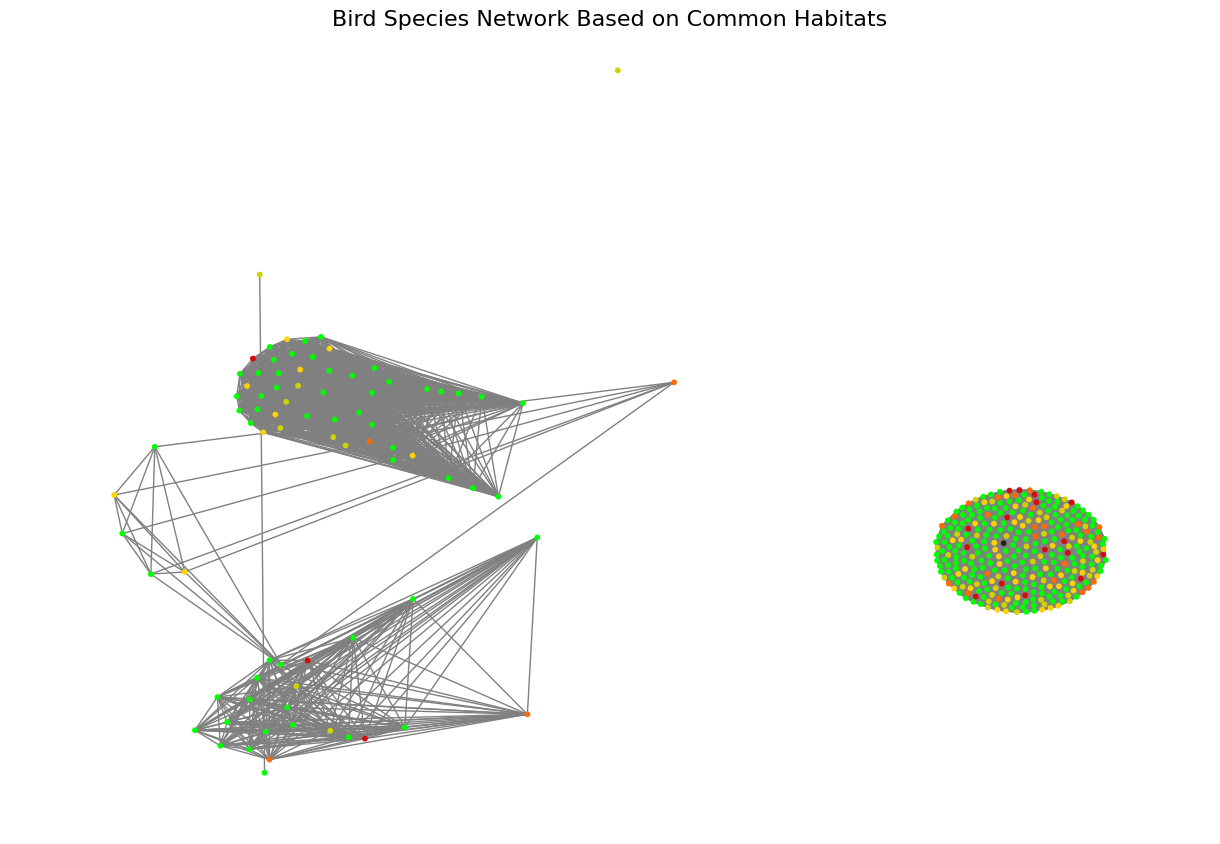

In [17]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filter relevant columns and convert latitude/longitude to numeric
columns_needed = ['scientificName', 'Habitat', 'redlistCategory']
network_data = df[columns_needed].dropna()

# Drop rows with NaN values after conversion
network_data = network_data.dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize graph
G = nx.Graph()

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges based on geographic proximity (difference in latitude and longitude < 10)
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            if row1['Habitat'] == row2['Habitat']:
                G.add_edge(row1['scientificName'], row2['scientificName'])

# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G, k=0.8, iterations=100)  # Compute layout for visualization

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=10)
plt.title("Bird Species Network Based on Common Habitats", fontsize=16)
plt.show()

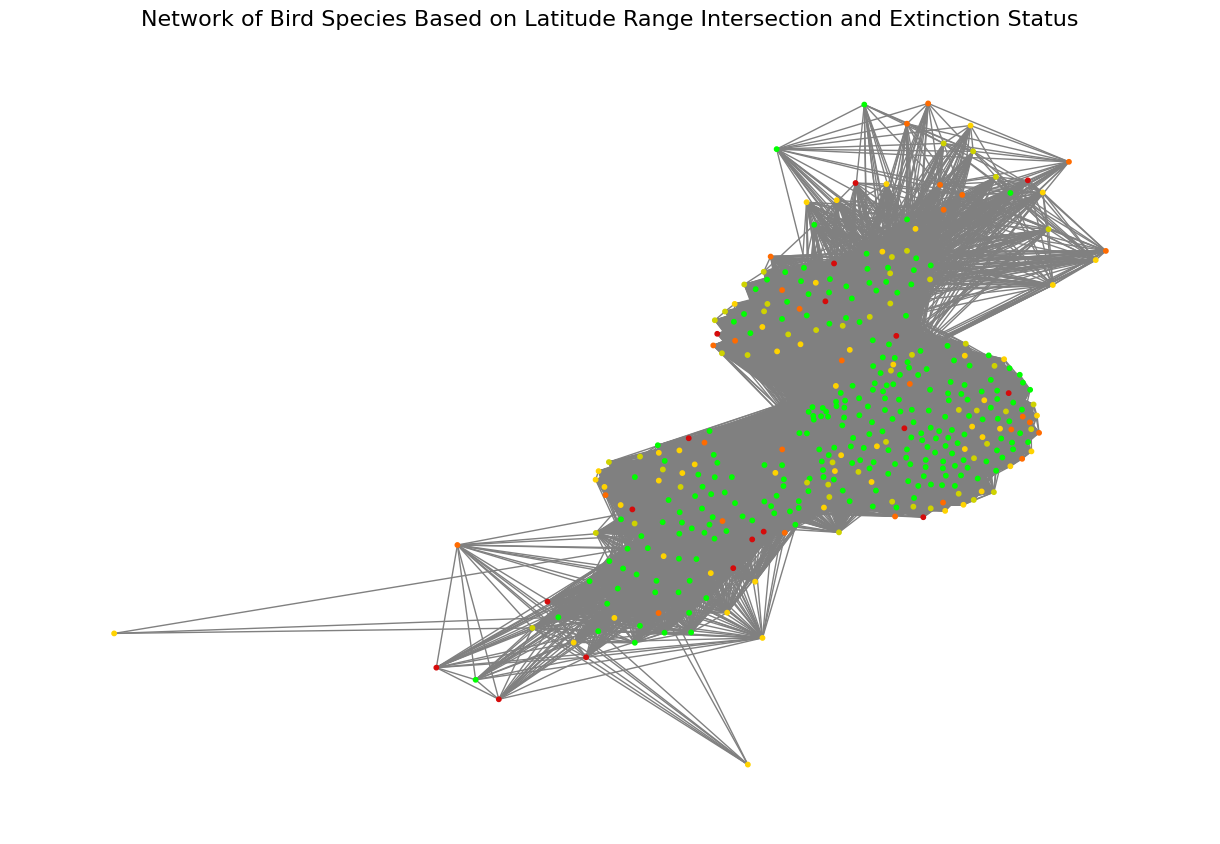

In [18]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filter relevant columns and convert latitude values to numeric
columns_needed = ['scientificName', 'Min.Latitude', 'Max.Latitude', 'redlistCategory']
network_data = df[columns_needed].dropna()

network_data['Min.Latitude'] = pd.to_numeric(network_data['Min.Latitude'], errors='coerce')
network_data['Max.Latitude'] = pd.to_numeric(network_data['Max.Latitude'], errors='coerce')

# Drop rows with NaN values after conversion
network_data = network_data.dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize graph
G = nx.Graph()

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges if latitude ranges intersect
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            # Check for intersection in latitude ranges
            if not (row1['Max.Latitude'] < row2['Min.Latitude'] or row1['Min.Latitude'] > row2['Max.Latitude']):
                G.add_edge(row1['scientificName'], row2['scientificName'])

# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G, k=0.8, iterations=100)  # Compute layout for visualization

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=10)
plt.title("Network of Bird Species Based on Latitude Range Intersection and Extinction Status", fontsize=16)
plt.show()


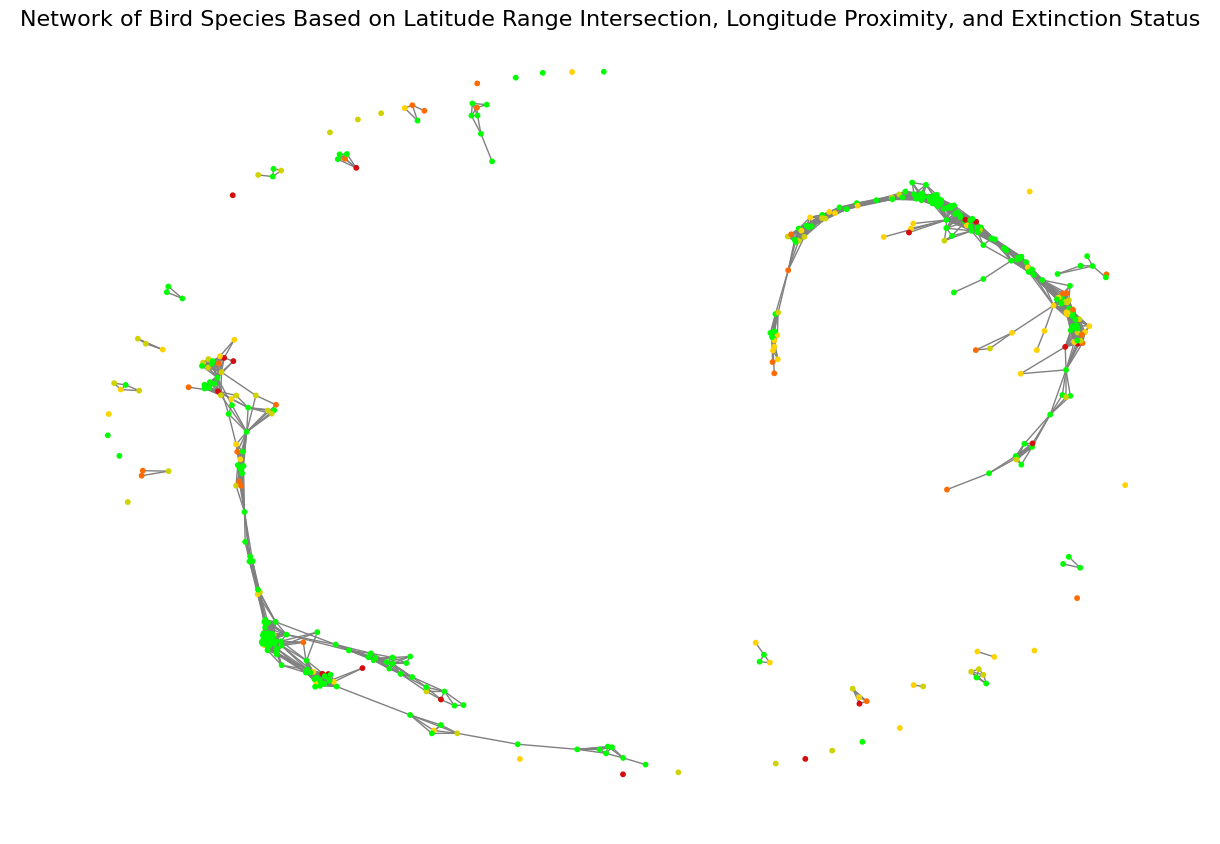

In [19]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filter relevant columns and convert latitude and longitude values to numeric
columns_needed = ['scientificName', 'Min.Latitude', 'Max.Latitude', 'Centroid.Longitude', 'redlistCategory']
network_data = df[columns_needed].dropna()

network_data['Min.Latitude'] = pd.to_numeric(network_data['Min.Latitude'], errors='coerce')
network_data['Max.Latitude'] = pd.to_numeric(network_data['Max.Latitude'], errors='coerce')
network_data['Centroid.Longitude'] = pd.to_numeric(network_data['Centroid.Longitude'], errors='coerce')

# Drop rows with NaN values after conversion
network_data = network_data.dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize graph
G = nx.Graph()

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges if latitude ranges intersect and longitude difference is less than 3
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            # Check for intersection in latitude ranges
            lat_intersects = not (row1['Max.Latitude'] < row2['Min.Latitude'] or row1['Min.Latitude'] > row2['Max.Latitude'])
            lon_diff = abs(row1['Centroid.Longitude'] - row2['Centroid.Longitude'])
            if lat_intersects and lon_diff < 3:
                G.add_edge(row1['scientificName'], row2['scientificName'])

# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G, k=1.5, iterations=1500)  # Compute layout for visualization

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=10)
plt.title("Network of Bird Species Based on Latitude Range Intersection, Longitude Proximity, and Extinction Status", fontsize=16)
plt.show()


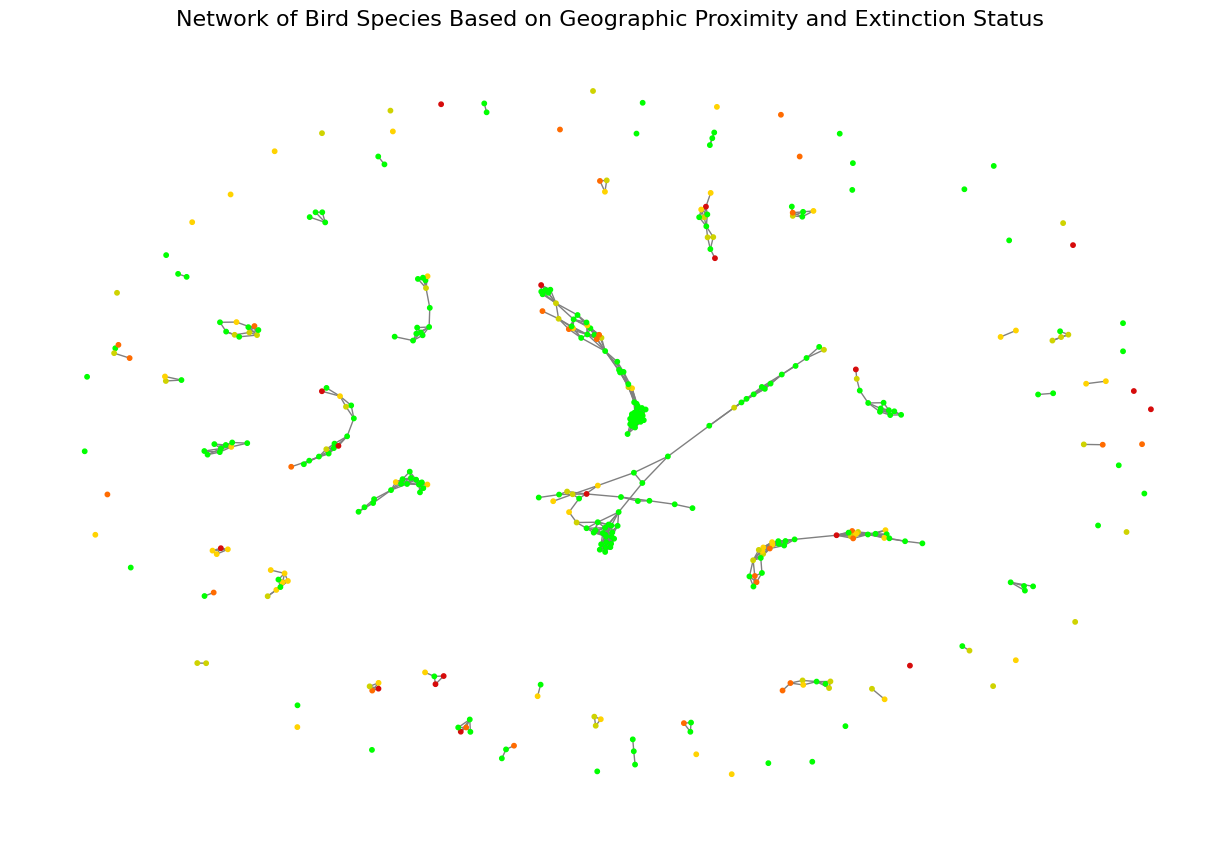

In [20]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filter relevant columns and convert latitude/longitude to numeric
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory']
network_data = df[columns_needed].dropna()

network_data['Centroid.Latitude'] = pd.to_numeric(network_data['Centroid.Latitude'], errors='coerce')
network_data['Centroid.Longitude'] = pd.to_numeric(network_data['Centroid.Longitude'], errors='coerce')

# Drop rows with NaN values after conversion
network_data = network_data.dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize graph
G = nx.Graph()

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges based on geographic proximity (difference in latitude and longitude < 10)
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            lat_diff = abs(row1['Centroid.Latitude'] - row2['Centroid.Latitude'])
            lon_diff = abs(row1['Centroid.Longitude'] - row2['Centroid.Longitude'])
            if lat_diff < 3 and lon_diff < 3:
                G.add_edge(row1['scientificName'], row2['scientificName'])

# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G)  # Compute layout for visualization

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=10)
plt.title("Network of Bird Species Based on Geographic Proximity and Extinction Status", fontsize=16)
plt.show()
